In [62]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [63]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import models,transforms
from torch.utils.data import Dataset,DataLoader
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.impute import KNNImputer
%matplotlib inline

In [64]:
path='drive/MyDrive/competitions/flixstock/classification-assignment/'

In [65]:
attributes=pd.read_csv(path+'attributes.csv')
attributes.head()

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6.0,1.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0


In [66]:
#df.head(20)

In [67]:
images=glob(path+'images/'+"*.jpg")
images= [x.split('/')[6] for x in images]
for i in range (len(attributes)):
  if attributes['filename'][i] in images:
    pass
  else:
    attributes.drop(index=i,inplace=True)
attributes=attributes.reset_index(drop=True)
attributes.head()

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
3,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
4,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,NaN


In [68]:
attributes.isna().sum()

filename           0
neck             372
sleeve_length    365
pattern          359
dtype: int64

In [69]:
attributes=attributes.fillna(-1)
#df

In [70]:
train_df,val_df=train_test_split(attributes,test_size=0.2,random_state=42)

In [71]:
train_df=train_df.reset_index(drop=True)
val_df=val_df.reset_index(drop=True)

In [72]:
def sample_data(df,n_samples):
  df1=df[(df['neck']==0) & (df['sleeve_length']!=3)  & (df['pattern']!=9) ].sample(n_samples,replace=True)
  df2=df[(df['neck']==1)  & (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)
  df3=df[(df['neck']==2) & (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)
  df4=df[(df['neck']==3) & (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)
  df5=df[(df['neck']==4)& (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)
  df6=df[(df['neck']==5) & (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)
  df7=df[(df['neck']==6) & (df['sleeve_length']!=3)  & (df['pattern']!=9)].sample(n_samples,replace=True)

  df8=df[(df['sleeve_length']==0) & (df['neck']!=6) & (df['pattern']!=9) ].sample(n_samples,replace=True)
  df9=df[(df['sleeve_length']==1) & (df['neck']!=6) & (df['pattern']!=9)].sample(n_samples,replace=True)
  df10=df[(df['sleeve_length']==2) & (df['neck']!=6) & (df['pattern']!=9)].sample(n_samples,replace=True)
  df11=df[(df['sleeve_length']==3) & (df['neck']!=6) & (df['pattern']!=9)].sample(n_samples,replace=True)

  df12=df[(df['pattern']==0) ].sample(n_samples,replace=True)
  df13=df[(df['pattern']==1) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df14=df[(df['pattern']==2) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df15=df[(df['pattern']==3) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df16=df[(df['pattern']==4) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df17=df[(df['pattern']==5) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df18=df[(df['pattern']==6) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df19=df[(df['pattern']==7) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df20=df[(df['pattern']==8) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)
  df21=df[(df['pattern']==9) & (df['sleeve_length']!=3) & (df['neck']!=6)].sample(n_samples,replace=True)

  data=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,
              df12,df13,df14,df15,df16,df17,df18,df19,df20,df21])
  data=data.reset_index(drop=True)
  return data

In [73]:
#imputer=KNNImputer(n_neighbors=5)
#attributes[['neck','sleeve_length','pattern']]=pd.DataFrame(np.round(imputer.fit_transform(attributes.drop(['filename'],axis=1))))

In [74]:
def plot_barplot(df):
  plt.figure(figsize=(12,6))
  plt.subplot(311)
  plt.bar(df['neck'].value_counts().index,df['neck'].value_counts())
  plt.subplot(312)
  plt.bar(df['sleeve_length'].value_counts().index,df['sleeve_length'].value_counts())
  plt.subplot(313)
  plt.bar(df['pattern'].value_counts().index,df['pattern'].value_counts())

In [76]:
data=sample_data(train_df,n_samples=100)

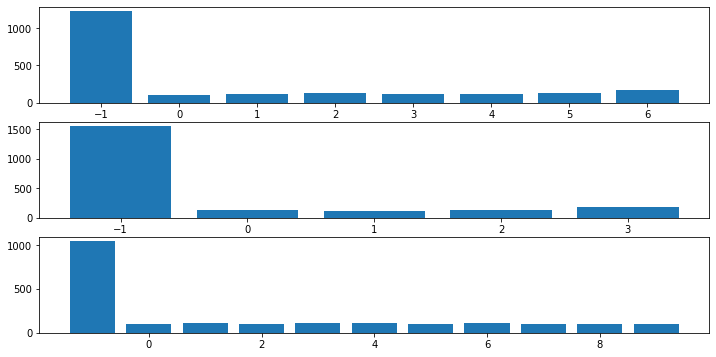

In [77]:
plot_barplot(data)

In [78]:
data

,filename,neck,sleeve_length,pattern
0,219fa830-9002-4e15-b101-6431540c72d41533298728...,0.0,-1.0,-1.0
1,219fa830-9002-4e15-b101-6431540c72d41533298728...,0.0,-1.0,-1.0
2,219fa830-9002-4e15-b101-6431540c72d41533298728...,0.0,-1.0,-1.0
3,219fa830-9002-4e15-b101-6431540c72d41533298728...,0.0,-1.0,-1.0
4,219fa830-9002-4e15-b101-6431540c72d41533298728...,0.0,-1.0,-1.0
...,...,...,...,...
2095,11519196652975-Roadster-Men-Brown-Solid-Henley...,0.0,-1.0,9.0
2096,11521697527436-GRITSTONES-Men-Tshirts-41115216...,-1.0,2.0,9.0
2097,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,-1.0,0.0,9.0
2098,48fca598-64e0-4f3d-85de-272d9b2d46761533895084...,-1.0,1.0,9.0


In [79]:
def plot_img(df,num):
  try:
    img=Image.open(path+'images/'+df['filename'][num])
    plt.imshow(img)
    plt.title('neck:'+str(df['neck'][num])+' sleeve_len:'+str(df['sleeve_length'][num])+' pat:'+str(df['pattern'][num]));
    
    plt.axis('off')
  except IOError as e:
    pass

94b6ab4b-50c9-4d10-847a-4b4482531d651529052514444-HRX-by-Hrithik-Roshan-Men-White-Printed-Round-Neck-T-shirt-4-2.jpg


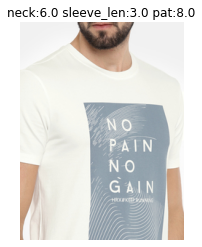

In [80]:
num=10
print(attributes['filename'][num])
plot_img(num)

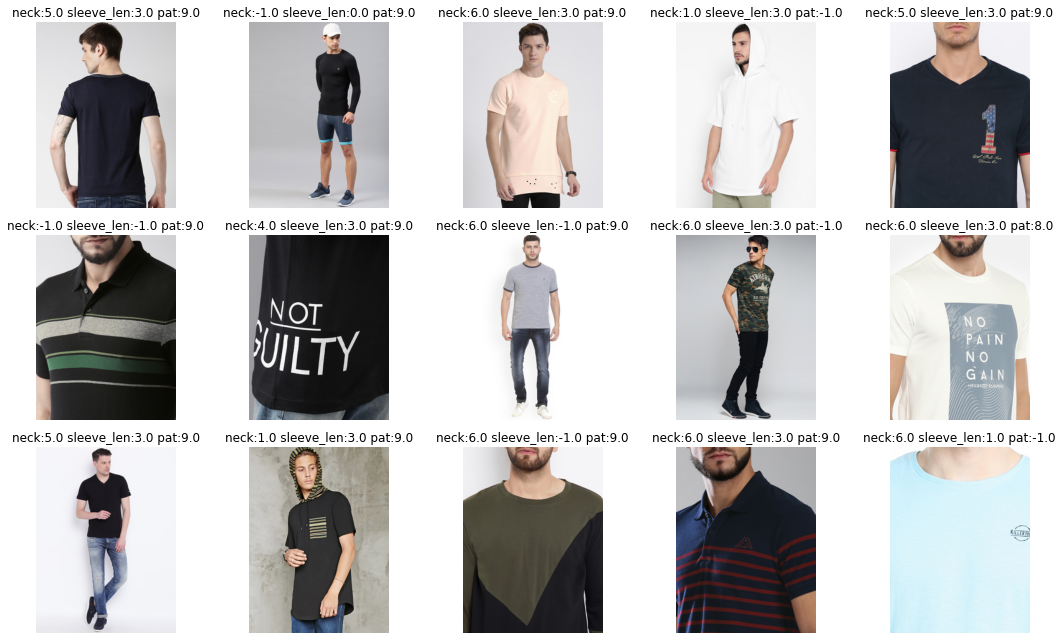

In [81]:
plt.figure(figsize=(15,9))
for i in range(1,16):
  plt.subplot(3,5,i)
  plot_img(i)
plt.tight_layout()

In [82]:
#df=df[(df['neck']==6.0) & (df['sleeve_length']==3.0) & (df['pattern']==9.0)]
#df1=df[df['neck']==6].sample(100)
#df2=df[df['sleeve_length']==3].sample(100)
#df3=df[df['pattern']==9].sample(100)
#df=pd.concat([df1,df2,df3]).drop_duplicates(keep=False)

In [83]:
#df.shape

In [84]:
samples_neck=data['pattern'].value_counts().drop(index=-1.0).sort_values()
print(samples_neck)
#weights_neck=(samples_neck/samples_neck.sum()).to_numpy()
#weights_neck_tensor=torch.tensor(weights_neck,dtype=torch.float32).to(device)

9.0    100
0.0    102
8.0    103
5.0    104
7.0    105
2.0    105
4.0    107
1.0    109
3.0    111
6.0    113
Name: pattern, dtype: int64


In [85]:
def get_weights(df):
  samples_neck=df['neck'].value_counts().drop(index=-1.0).sort_values()
  weights_neck=(1-samples_neck/samples_neck.sum()).to_numpy()
  weights_neck_tensor=torch.tensor(weights_neck,dtype=torch.float32).to(device)
  #weights_neck_tensor
  samples_sleeves=df['sleeve_length'].value_counts().drop(index=-1.0).sort_values()
  weights_sleeves=(1-samples_sleeves/samples_sleeves.sum()).to_numpy()
  weights_sleeves_tensor=torch.tensor(weights_sleeves,dtype=torch.float32).to(device)
  #weights_sleeves_tensor
  samples_pattern=df['pattern'].value_counts().drop(index=-1.0).sort_values()
  weights_pattern=(1-samples_pattern/samples_pattern.sum()).to_numpy()
  weights_pattern_tensor=torch.tensor(weights_pattern,dtype=torch.float32).to(device)
  #weights_pattern_tensor
  return  weights_neck_tensor,weights_sleeves_tensor,weights_pattern_tensor

In [86]:
#get_weights()

In [87]:
class ClothData(Dataset):
  def __init__(self,path,images_df):
    self.path=path
    self.images_df=images_df
    self.transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0),
        transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2),
                            shear=None, fill=(255, 255, 255)),
        transforms.ToTensor()
    ])
  def __len__(self):
    return len(self.images_df)
  def __getitem__(self,idx):
    image=Image.open(self.path+'images/'+self.images_df['filename'][idx])
    #convert image to numpy array
    #image=np.asarray(image).astype(np.float32)
    labels=self.images_df.iloc[idx,1:4].values.astype(np.long)

    label1=torch.tensor(labels[0],dtype=torch.long)
    label2=torch.tensor(labels[1],dtype=torch.long)
    label3=torch.tensor(labels[2],dtype=torch.long)
  

    image=self.transform(image)
    return {
        'features':image, 'label1':label1,'label2':label2,'label3':label3
    }


In [88]:
cloth_dataset=ClothData(path,data)

In [89]:
val_df=val_df[(val_df['neck']!=-1) & (val_df['sleeve_length']!=-1) &(val_df['pattern']!=-1)]
val_df=val_df.reset_index(drop=True)
val_df

,filename,neck,sleeve_length,pattern
0,11521008394129-Aeropostale-Men-Blue-Colourbloc...,3.0,3.0,9.0
1,11495102688713-Roadster-Men-Olive-Green-Printe...,6.0,3.0,9.0
2,11512546146672-Elaborado-Men-Platinum-Grey-Hen...,6.0,0.0,9.0
3,11508138154934-FOREVER-21-Men-Tshirts-15515081...,1.0,3.0,9.0
4,11508310327354-FOREVER-21-Men-Tshirts-30615083...,6.0,2.0,9.0
...,...,...,...,...
181,11520917658828-Vudu-Mens-Casual-Grey-Color-T-S...,6.0,3.0,9.0
182,11511415241596-Vineyard-Stripped-Thumbhole-Tee...,6.0,3.0,9.0
183,11513335212191-French-Connection-Men-Red-Print...,6.0,1.0,9.0
184,11524738948806-s-9301524738948693-5.jpg,2.0,3.0,9.0


In [90]:
cloth_dataset_valid=ClothData(path,val_df)

In [91]:
#cloth_dataloader=DataLoader(cloth_dataset,batch_size=4)

In [92]:
#next(iter(cloth_dataloader))

In [93]:
#models.mobilenet_v2()

In [94]:
models.mobilenet_v2().last_channel

1280

In [95]:
class Net(nn.Module):
  def __init__(self,n_classes_neck,n_classes_sleeve,n_classes_pattern):
    super().__init__()
    # take the model without classifier
    self.base_model=models.mobilenet_v2(pretrained=True).features
    for param in self.base_model.parameters():
      param.requires_grad = False
    # size of the layer before the classifier
    last_channel = models.mobilenet_v2().last_channel
    self.pool = nn.AdaptiveAvgPool2d((1,1))
    # create separate classifiers for our outputs
    self.neck=nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(in_features=last_channel,out_features=n_classes_neck)
    )
    self.sleeve=nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(in_features=last_channel,out_features=n_classes_sleeve)
    )
    self.pattern=nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(in_features=last_channel,out_features=n_classes_pattern)
    )
  def forward(self,x):
    x=self.base_model(x)
    x=self.pool(x)
    # reshape from [batch, channels, 1, 1] to [batch, channels] to put it into classifier
    x=torch.flatten(x,start_dim=1)
    out1=self.neck(x)
    out2=self.sleeve(x)
    out3=self.pattern(x)
    return out1,out2,out3

In [102]:
device=torch.device('cuda' if torch.cuda.is_available() else "cpu")
#model=ResNet18(n_classes=24).to(device)
n_classes_neck=7
n_classes_sleeve=4
n_classes_pattern=10
model=Net(n_classes_neck,n_classes_sleeve,n_classes_pattern).to(device)

In [103]:
def model_loss_function(outputs,targets,device):
  o1,o2,o3=outputs
  t1,t2,t3=targets
  #w1,w2,w3=get_weights()

  l1=nn.CrossEntropyLoss(ignore_index=-1)(o1,t1)
  l2=nn.CrossEntropyLoss(ignore_index=-1)(o2,t2)
  l3=nn.CrossEntropyLoss(ignore_index=-1)(o3,t3)
  loss=(l1+l2+l3)/3
  return loss

In [104]:
epochs= 30
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
cloth_dataloader=DataLoader(cloth_dataset,batch_size=64,shuffle=True)

In [105]:
#cloth_dataloader=DataLoader(cloth_dataset,batch_size=1)
#next(iter(cloth_dataloader))

In [106]:
from tqdm.notebook import tqdm

In [107]:
epoch_loss=[]
for i in range(epochs):
  print(i)
  model.train()
  counter = 0
  train_running_loss = 0.0
  for data in tqdm(cloth_dataloader):
    counter += 1
    imgs=data['features'].to(device)
    target1=data['label1'].to(device)
    target2=data['label2'].to(device)
    target3=data['label3'].to(device)
    outputs=model(imgs)
    targets=(target1,target2,target3)
   
 
    loss=model_loss_function(outputs,targets,device)
    train_running_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  train_loss = train_running_loss / counter
  epoch_loss.append(train_loss)
  #exp_lr_scheduler.step()


0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29


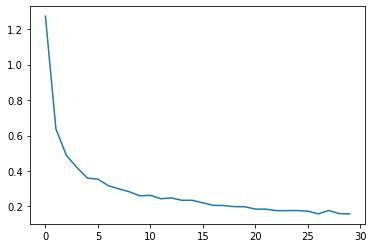

In [108]:
plt.plot(epoch_loss)

In [109]:
torch.save(model.state_dict(), path+'custom_model_mobilenet_pretrained_loss_final3.pth')

In [110]:
device=torch.device('cuda' if torch.cuda.is_available() else "cpu")
n_classes_neck=7
n_classes_sleeve=4
n_classes_pattern=10
model = Net(n_classes_neck,n_classes_sleeve,n_classes_pattern)
model.load_state_dict(torch.load(path+'custom_model_mobilenet_pretrained_loss_final3.pth'))
model.to(device)
model.eval()

Net(
  (base_model): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.

In [111]:
cloth_val_dataloader=DataLoader(cloth_dataset_valid,batch_size=64)

In [112]:
true_labels_neck=[]
pred_labels_neck=[]
true_labels_sleeves=[]
pred_labels_sleeves=[]
true_labels_pattern=[]
pred_labels_pattern=[]
model.eval()
for i, test_sample in enumerate(cloth_val_dataloader):
    print(f"SAMPLE {i}")
    # extract the features and labels
    features = test_sample['features'].to(device)
    target1 = test_sample['label1'].to(device)
    target2 = test_sample['label2'].to(device)
    target3 = test_sample['label3'].to(device)
    
    
    outputs = model(features)
            
    # get all the output labels
    # whichever is bigger of the two values, we will consider that index position
    all_labels = []
    for out in outputs:
        #all_labels.append(int(np.argmax(out.detach().cpu())))
        all_labels.append(list(out.argmax(axis=1).detach().cpu().numpy()))
        
    targets = (target1, target2, target3)
    # get all the targets in int format from tensor format
    all_targets = []
    for target in targets:
        all_targets.append(list(target.squeeze(0).detach().cpu().numpy()))
    #print(target1,target2,target3) 
    #print(outputs)
    print(all_targets[0])
    print(all_targets[1])
    print(all_targets[2])
    true_labels_neck.extend(all_targets[0])
    pred_labels_neck.extend(all_labels[0])
    true_labels_sleeves.extend(all_targets[1])
    pred_labels_sleeves.extend(all_labels[1])
    true_labels_pattern.extend(all_targets[2])
    pred_labels_pattern.extend(all_labels[2])     
    print(f"ALL PREDICTIONS: {all_labels}")
    print(f"GROUND TRUTHS: {all_targets}")
    

SAMPLE 0
[3, 6, 6, 1, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 4, 6, 0, 0, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 1, 6, 3, 5, 1, 1, 6, 6, 5, 3, 6, 6, 6, 0, 6, 1, 6, 6, 4, 0, 6, 0, 6, 5, 6, 6, 2, 5]
[3, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 0, 3, 3, 3]
[9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 9, 0, 5, 9, 9, 9, 1, 1, 9, 9, 9, 9, 9, 9, 4, 9, 5, 3, 9, 9, 9, 7, 2, 9, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 5, 9, 9]
ALL PREDICTIONS: [[2, 6, 6, 6, 3, 6, 6, 6, 6, 6, 4, 3, 6, 4, 6, 6, 6, 3, 6, 2, 4, 2, 6, 6, 6, 4, 6, 6, 6, 2, 6, 6, 4, 6, 5, 3, 6, 2, 6, 6, 6, 6, 6, 4, 4, 2, 6, 4, 4, 6, 6, 6, 6, 4, 6, 1, 6, 1, 6, 6, 2, 6, 6, 5], [3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 2, 0, 2, 3, 1, 3, 3, 3, 1, 3], [9, 0,

In [113]:
#all_targets[0]

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(confusion_matrix(true_labels_neck,pred_labels_neck))
print(confusion_matrix(true_labels_sleeves,pred_labels_sleeves))
print(confusion_matrix(true_labels_pattern,pred_labels_pattern))

[[ 0  2  1  0  3  0  5]
 [ 0  3  1  0  1  1 12]
 [ 0  0  0  0  1  1  6]
 [ 0  1  4  2  2  1  6]
 [ 0  0  1  0  0  0  8]
 [ 0  0  3  2  2  1 12]
 [ 0  0  7 10 20  7 60]]
[[  3   0   0   8]
 [  0   1   0  10]
 [  0   0  10   3]
 [  9  13   5 124]]
[[  1   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   1   0   1]
 [  0   0   3   0   2   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0]
 [  1   0   0   0   1   0   0   0   0   1]
 [  1   0   0   0   0   0   1   0   0   3]
 [  0   0   0   0   0   0   2   0   0   2]
 [  0   0   0   1   0   0   0   0   0   2]
 [  0   0   0   1   0   0   0   0   0   1]
 [  7   2   3  11   5   0   9   6   1 111]]


In [116]:
print(classification_report(true_labels_neck,pred_labels_neck))
print(classification_report(true_labels_sleeves,pred_labels_sleeves))
print(classification_report(true_labels_pattern,pred_labels_pattern))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.50      0.17      0.25        18
           2       0.00      0.00      0.00         8
           3       0.14      0.12      0.13        16
           4       0.00      0.00      0.00         9
           5       0.09      0.05      0.06        20
           6       0.55      0.58      0.56       104

    accuracy                           0.35       186
   macro avg       0.18      0.13      0.14       186
weighted avg       0.38      0.35      0.36       186

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.07      0.09      0.08        11
           2       0.67      0.77      0.71        13
           3       0.86      0.82      0.84       151

    accuracy                           0.74       186
   macro avg       0.46      0.49      0.47       186
weighted avg       0.76

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
